# Advanced histogram of julia
http://docs.juliaplots.org/latest/tutorial/

In [1]:
using Pkg
using CategoricalArrays
using Parameters
using Pipe
using Plots
using RDatasets
using StatsPlots

In [2]:
df = dataset("datasets", "iris")
first(df,5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Layout

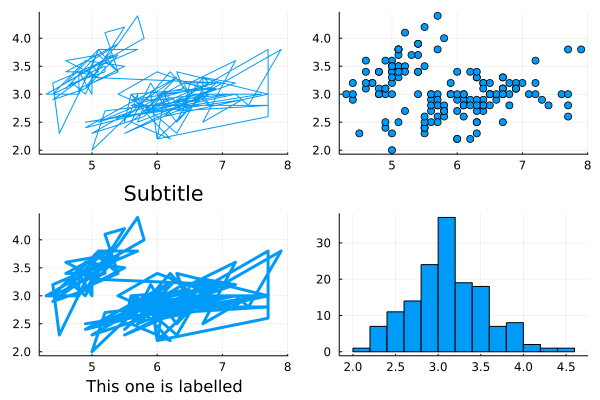

In [3]:
x = df.SepalLength
y = df.SepalWidth
p1 = plot(x, y) # Make a line plot
p2 = scatter(x, y) # Make a scatter plot
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y) 
plot(p1, p2, p3, p4, layout = (2, 2), legend = false, suptitle="two")

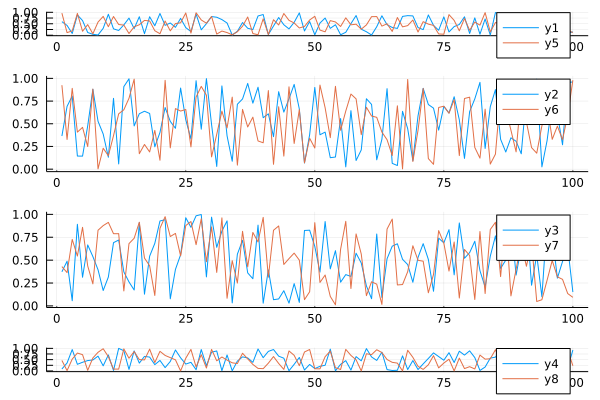

In [4]:
plot(rand(100, 4), layout = grid(4, 1, heights=[0.1 ,0.4, 0.4, 0.1]))
plot!(rand(100, 4), layout = grid(4, 1, heights=[0.1 ,0.4, 0.4, 0.1]))

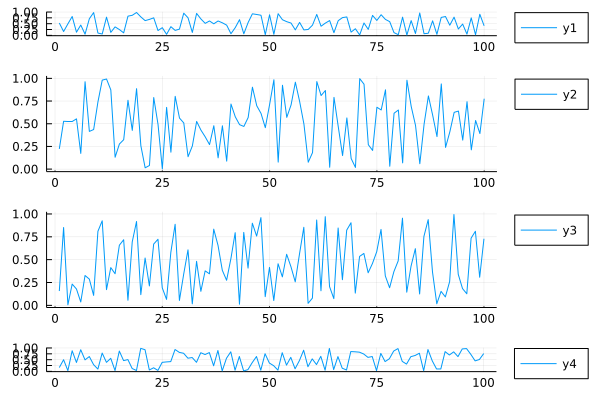

In [5]:
plot(rand(100, 4), layout = @layout([a{0.1h}; b; c; d{0.1h}]), legend=:outertopright)

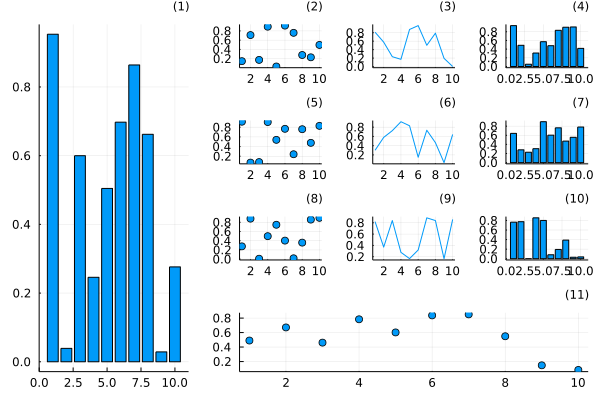

In [6]:
l = @layout [
    a{0.3w} [grid(3,3) ;  
             b{0.2h}  ]
]
plot(
    rand(10, 11),
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for j in 1:1, i in 1:11], titleloc = :right, titlefont = font(8)
)

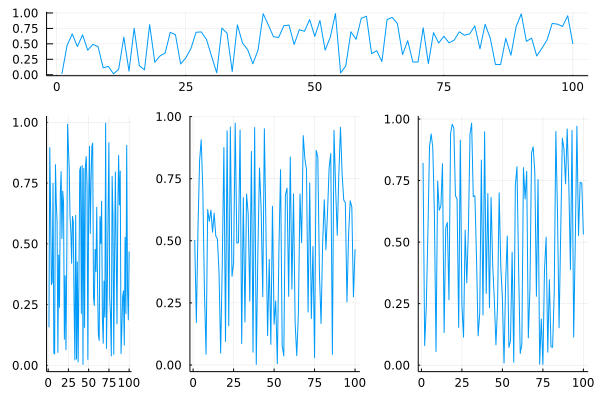

In [7]:
p1 = plot(rand(100))
p2 = plot(rand(100))
p3 = plot(rand(100))
p4 = plot(rand(100))
l = @layout [a{0.2h} ; b{0.2w} c d]
plot(p1,p2,p3, p4, layout=l, legend=false)

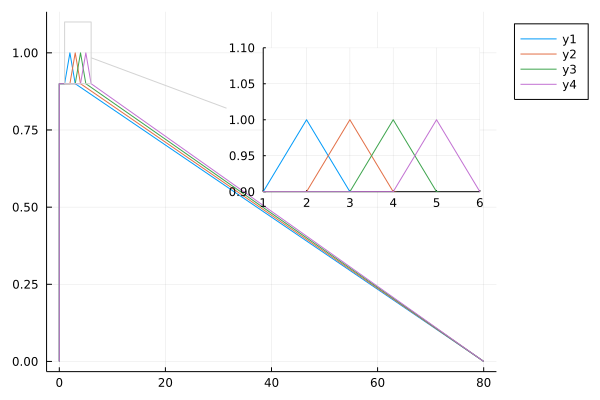

In [8]:
plot([(0, 0), (0, 0.9), (1, 0.9), (2, 1), (3, 0.9), (80, 0)], legend = :outertopright)
plot!([(0, 0), (0, 0.9), (2, 0.9), (3, 1), (4, 0.9), (80, 0)])
plot!([(0, 0), (0, 0.9), (3, 0.9), (4, 1), (5, 0.9), (80, 0)])
plot!([(0, 0), (0, 0.9), (4, 0.9), (5, 1), (6, 0.9), (80, 0)])
lens!([1, 6], [0.9, 1.1], inset = (1, bbox(0.4, 0.1, 0.4, 0.4)))

# Overlay

In [9]:
println("'|>' is a pipe operator")
names(df) |> println
size(df) |> println
unique(df.Species) |> println

'|>' is a pipe operator
["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
(150, 5)
["setosa", "versicolor", "virginica"]


In [10]:
cond = df.Species .== "setosa"
df[cond,"Species"] |> unique |> println
df[cond .== 0, "Species"] |> unique |> println
println("Bitwise operator")
df[.~cond, "Species"] |> unique |> println

["setosa"]
["versicolor", "virginica"]
Bitwise operator
["versicolor", "virginica"]


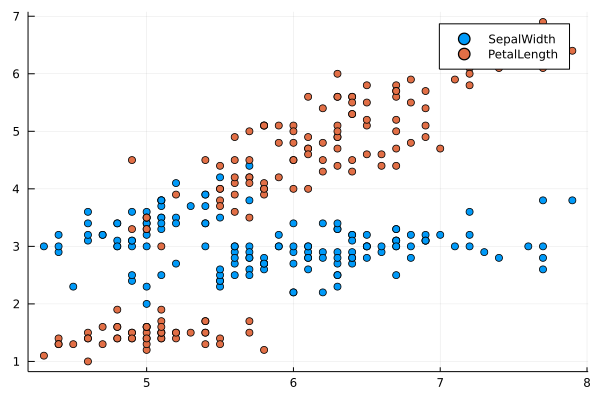

In [11]:
scatter(df.SepalLength, df.SepalWidth, label="SepalWidth")
scatter!(df.SepalLength, df.PetalLength, label="PetalLength")

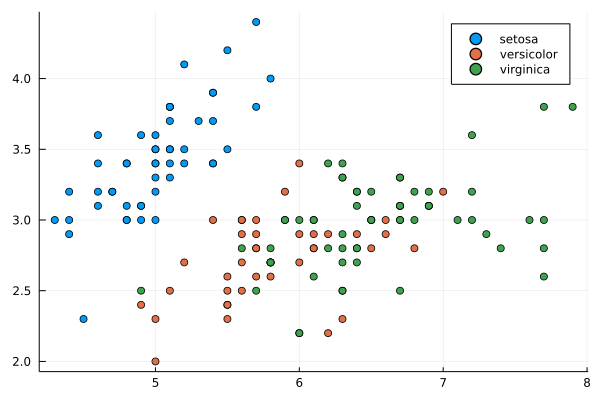

In [12]:
p = scatter(df[:, "SepalLength"], df[:, "SepalWidth"], group=df[:,"Species"])

In [13]:
println( "'@df' is a StatsPlots macro\n")

'@df' is a StatsPlots macro



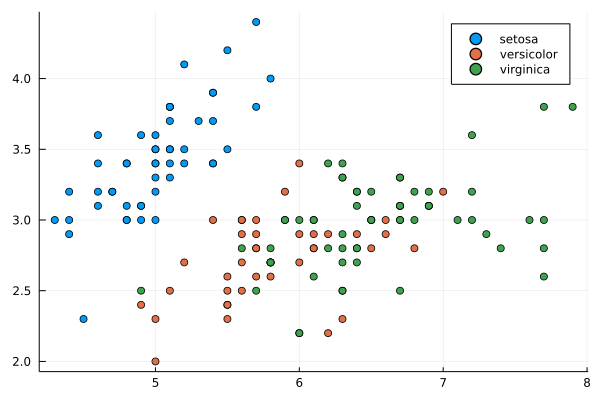

In [14]:
pt = @df df scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    m = (0.5, [:+ :h :star7], 7),
    #bg = RGB(0.2, 0.2, 0.2)
    size=(500,300),
    dpi=150,
    #legendloc=(.02,0.3)
)
display(p)
savefig("test.png")

### Note about variable scopes

In [15]:
t = 1 
for i in 1:10
    s = 1 
    t += s 
end
t |> println
@isdefined(s) |> println

11
false


# Histogram 

In [16]:
names(df) |> println
unique(df.Species) |> println

["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
["setosa", "versicolor", "virginica"]


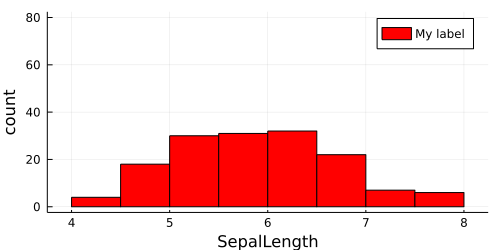

In [17]:
x = "SepalLength"
z = df[:,x]

low = z |> minimum |> floor
high = z |> maximum |> ceil
histogram(z,
    xlabel=x,
    ylabel="count",
    label= "My label",
    size=(500,250),
    bins = low:0.5:high,
    ylim=[0,80],
    color="red"
)

## Overlay 

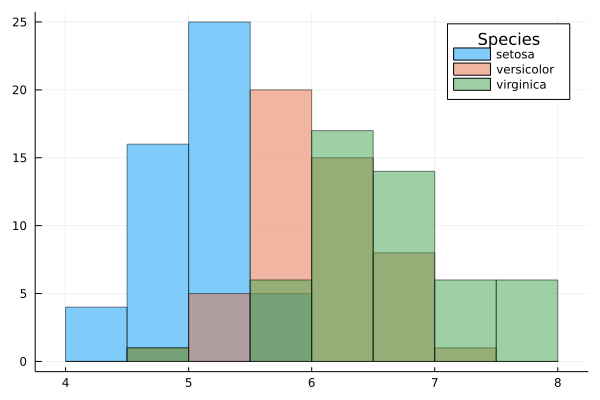

In [18]:
@df df histogram(
    :SepalLength,
    group=:Species,
    bins=4:0.5:8,
    alpha=0.5,
    legendtitle="Species",
)

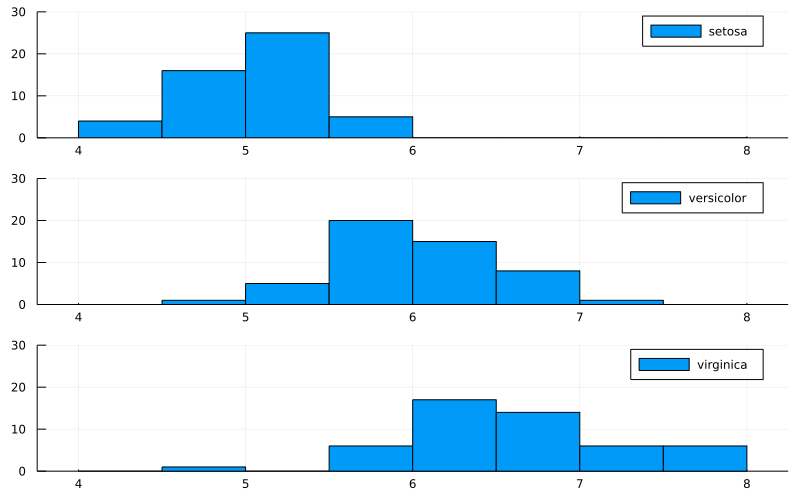

In [19]:
@df df histogram(
    :SepalLength,
    group=:Species,
    bins=4:0.5:8,
    #layout=3,
    layout = @layout([a ; b ; c]),
    size = (800,500),
    ylim=(0,30)
)

## Reorder plot 

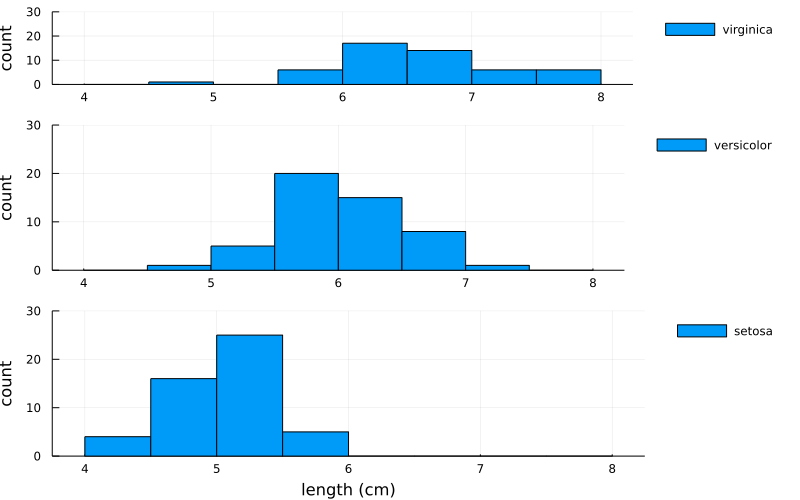

In [20]:
ct = CategoricalArray(df.Species, levels=["virginica","versicolor",  "setosa"])
df.SpeciesNew = ct
p = @df df histogram(
    :SepalLength,
    group=:SpeciesNew,
    bins=4:0.5:8,
    #layout=3,
    layout = @layout([a{0.2h} ; b ; c]),
    foreground_color_legend = nothing,
    background_color_legend= nothing,
    legend = :outertopright,
    size = (800,500),
    ylim=(0,30),
)
xlabel!(p[3], "length (cm)")
ylabel!("count")

#  Reuse keyword arguments

In [21]:
ct = CategoricalArray(df.Species, levels=["virginica","versicolor",  "setosa"])
df.SpeciesNew = ct

150-element CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [22]:
kargs = Dict(
    :foreground_color_legend => nothing,
    :background_color_legend => nothing,
)

Dict{Symbol, Nothing} with 2 entries:
  :foreground_color_legend => nothing
  :background_color_legend => nothing

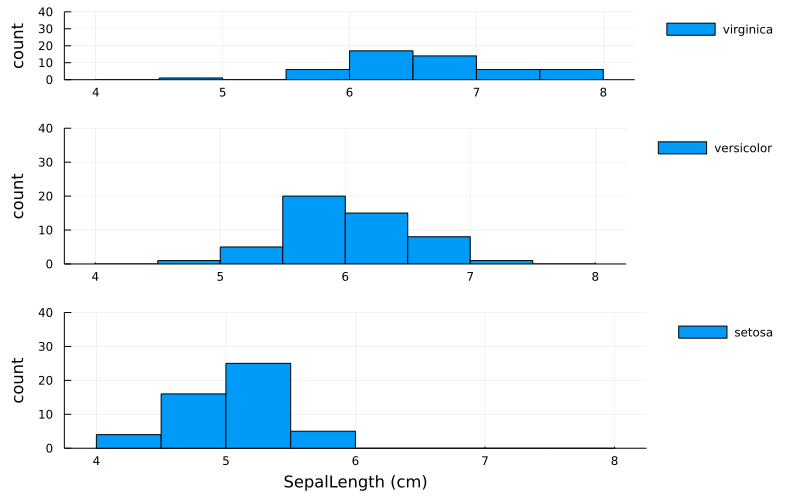

In [23]:
p = @df df histogram(
    :SepalLength,
    group= :SpeciesNew,
    bins=4:0.5:8,
    #layout=3,
    layout = @layout([a{0.2h} ; b ; c]),
    ylim=(0,40),
    size = (800,500),
    legend = :outertopright,
    left_margin = 4Plots.mm,
    bottom_margin = 3Plots.mm,
    ;kargs...
)
xlabel!(p[3], "SepalLength (cm)")
ylabel!("count")

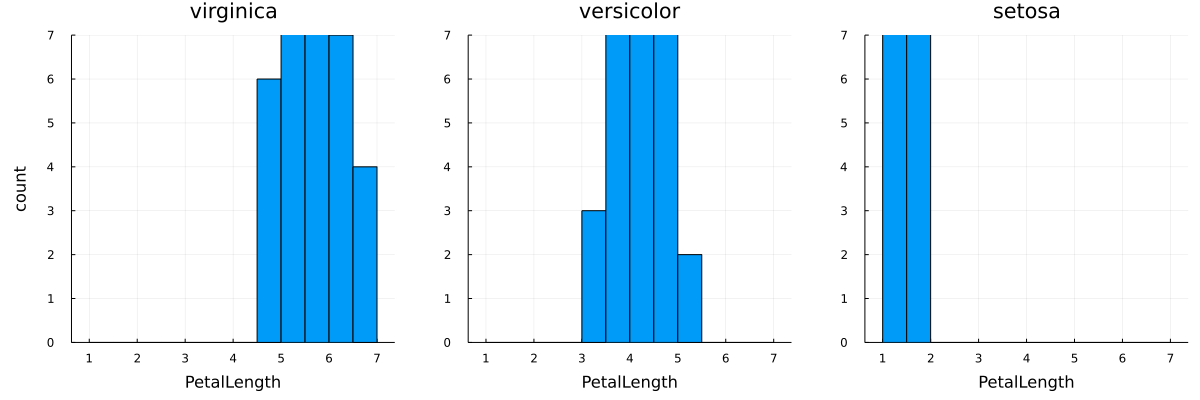

In [24]:
x = "PetalLength"
z = df[:,x]
low = z |> minimum |> floor
high = z |> maximum |> ceil
title = @pipe df[:, :SpeciesNew] |> levels |> reshape(_, 1, :)

p = @df df histogram(
    df[:,x],
    group= :SpeciesNew,
    bins=low:0.5:high,
    ylim = (0,high),
    layout = @layout([a b c]),
    size = (1200,400),
    left_margin =8Plots.mm,
    bottom_margin =7Plots.mm,
    top_margin = 4Plots.mm,
    title= title,
    legend=false,
    ;kargs...
)
xlabel!(x)
ylabel!(p[1],"count")

# Tips

In [25]:
@with_kw struct Foo
         x::Int32 = 4
         y::Float64
       end
foo = Foo(y = 1)

Foo
  x: Int32 4
  y: Float64 1.0


In [26]:
function f(foo ::Foo)
    @unpack x = foo
    println(x)
    return nothing
end
f(foo) 

function g(foo ::Foo)
    @unpack_Foo foo
    println("$x, $y")
end
g(foo)

4
4, 1.0


# Multi-threading 

In [35]:
using IJulia
IJulia.installkernel("Julia 4 Threads", env=Dict(
    "JULIA_NUM_THREADS" => "4",
))

┌ Info: Installing Julia 4 Threads kernelspec in /home/toshiaki/.local/share/jupyter/kernels/julia-4-threads-1.6
└ @ IJulia /home/toshiaki/.julia/packages/IJulia/e8kqU/deps/kspec.jl:94


"/home/toshiaki/.local/share/jupyter/kernels/julia-4-threads-1.6"

In [38]:
n = 60
@time begin 
    for i in 1:n
        print(i, ",")
    end
end

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,  0.000950 seconds (1.94 k allocations: 46.484 KiB)


In [39]:
@time Threads.@threads  for i in 1:n print(i,",")  end

1,2,3,4,31,5,6,7,46,8,32,33,9,16,10,11,47,34,48,35,12,49,36,17,37,13,38,18,39,19,40,20,14,21,41,42,22,23,50,24,25,26,51,15,52,27,28,29,43,30,44,45,53,54,55,56,57,58,59,60,  0.027078 seconds (18.74 k allocations: 1.015 MiB, 94.49% compilation time)
